In [1]:
from pathlib import Path

In [2]:
import matplotlib.pyplot as plt

In [3]:
import torchvision

In [4]:
import random

In [5]:
import os

In [6]:
import numpy as np

# Data directory

In [7]:
Path.cwd()

PosixPath('/media/skesava/D/Training/MachineLearning/Pytorch/CarsClassification_PyTorch_Lightning/notebooks')

In [8]:
data_directory = Path.cwd().parent.parent.parent
data_directory

PosixPath('/media/skesava/D/Training/MachineLearning')

In [9]:
data_directory = data_directory.joinpath('ML datasets/StanfordCarDataset/archive')

In [10]:
data_directory.exists()

True

In [11]:
data_directory

PosixPath('/media/skesava/D/Training/MachineLearning/ML datasets/StanfordCarDataset/archive')

In [12]:
# training data directory
training_data_dir = data_directory.joinpath('cars_train/cars_train')
training_data_dir.exists()

True

In [13]:
# test data directory
test_data_dir = data_directory.joinpath('cars_test/cars_test')
test_data_dir.exists()

True

## Number of images

### Train

In [14]:
_, _, train_files = next(os.walk(training_data_dir))
train_file_count = len(train_files)
train_file_count

8144

### Test

In [15]:
_, _, test_files = next(os.walk(test_data_dir))
test_file_count = len(test_files)
test_file_count

8041

# Visualisation of images: overview

In [16]:
img_list=[]
[img_list.append(
    torchvision.io.read_image(
        training_data_dir.joinpath(
            random.choice(os.listdir(training_data_dir))
        )
    )
) for i in range(16)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [17]:
img_list

[tensor([[[246, 246, 246,  ..., 246, 247, 247],
          [246, 246, 246,  ..., 246, 247, 247],
          [246, 246, 246,  ..., 246, 246, 246],
          ...,
          [226, 226, 226,  ..., 226, 226, 226],
          [226, 226, 226,  ..., 226, 226, 226],
          [226, 226, 226,  ..., 226, 226, 226]],
 
         [[245, 245, 245,  ..., 245, 246, 246],
          [245, 245, 245,  ..., 245, 246, 246],
          [245, 245, 245,  ..., 245, 245, 245],
          ...,
          [225, 225, 225,  ..., 225, 225, 225],
          [225, 225, 225,  ..., 225, 225, 225],
          [225, 225, 225,  ..., 225, 225, 225]],
 
         [[251, 251, 251,  ..., 251, 252, 252],
          [251, 251, 251,  ..., 251, 252, 252],
          [251, 251, 251,  ..., 251, 251, 251],
          ...,
          [231, 231, 231,  ..., 231, 231, 231],
          [231, 231, 231,  ..., 231, 231, 231],
          [231, 231, 231,  ..., 231, 231, 231]]], dtype=torch.uint8),
 tensor([[[255, 255, 255,  ..., 255, 255, 255],
          [255,

In [18]:
img = img_list[0]

In [19]:
img.shape

torch.Size([3, 280, 450])

In [20]:
img.T.transpose(0,1).shape

/tmp/ipykernel_1425827/3559601732.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3697.)
  img.T.transpose(0,1).shape


torch.Size([280, 450, 3])

In [21]:
img.T.shape

torch.Size([450, 280, 3])

In [22]:
# transposing

In [23]:
# torchvision.utils.make_grid(img_list, nrow=4)

#### Note: make_grid

* make_grid fails because the images are not of the same dimensions

In [24]:
from PIL import Image

In [25]:
from mpl_toolkits.axes_grid1 import ImageGrid

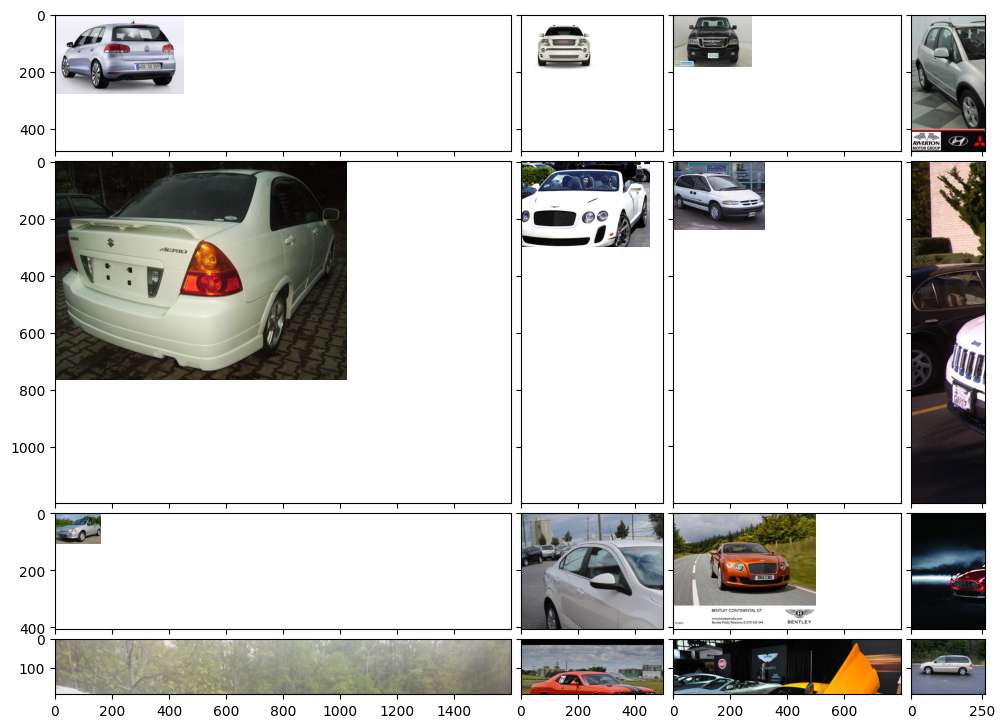

In [26]:
fig = plt.figure(figsize=(12,12))

grid = ImageGrid(fig, 111, nrows_ncols=(4,4), axes_pad=0.1)

for ax, img in zip(grid, img_list):
    ax.imshow(img.T.transpose(0,1).numpy())

plt.show()

### Note: ImageGrid 
* ImageGrid is no good

## Pyplot subplot

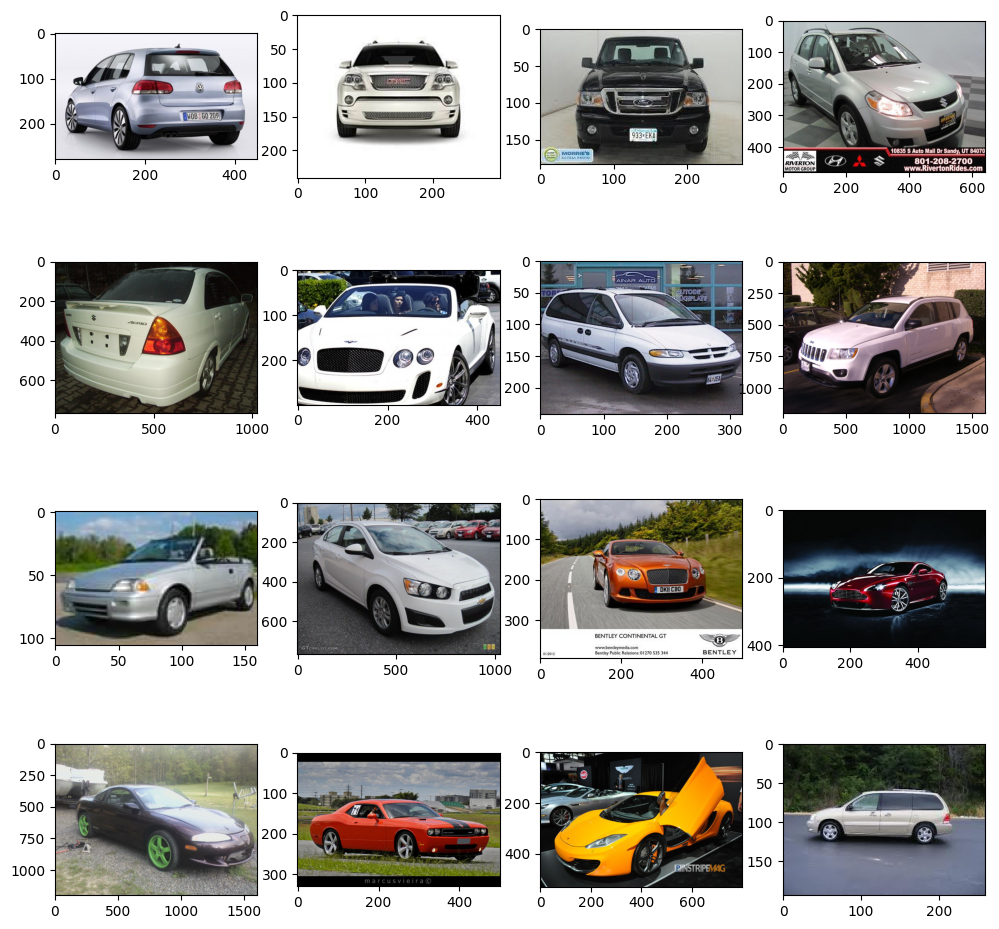

In [27]:
fig2 = plt.figure(figsize=(12,12))
ax2 = []
for idx, img in enumerate(img_list):
    ax2.append( fig2.add_subplot(4,4,idx+1))
    ax2[idx].imshow(img_list[idx].T.transpose(0,1).numpy())

plt.show()
    

# ax2 = fig2.add_subplot(4,4,1)
# ax2.imshow(img_list[9].T.transpose(0,1).numpy())
# ax3 = fig2.add_subplot(4,4,2)
# ax3.imshow(img_list[12].T.transpose(0,1).numpy())
# plt.show()

# Notes

1. Coloured images: 3 channels
2. Image dimensions original format: (channels, height, width)
3. Train images: 8144, Test images: 8041

# Y labels

In [28]:
import scipy

In [29]:
y_labels = scipy.io.loadmat(data_directory.joinpath('cars_annos.mat'))

In [30]:
type(y_labels)

dict

In [31]:
y_labels.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])

In [75]:
y_labels['__header__']

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Feb 28 19:34:55 2015'

In [76]:
y_labels['__version__']

'1.0'

In [77]:
y_labels['__globals__']

[]

## Annotations key

In [33]:
y_labels['annotations']

array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        ...,
        (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8)),
        (array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), array([

In [34]:
type(y_labels['annotations'])

numpy.ndarray

In [35]:
y_labels['annotations'].size

16185

In [40]:
y_labels['annotations'].shape

(1, 16185)

In [38]:
y_labels['annotations'][0].size

16185

In [41]:
y_labels['annotations'][0][0]

np.void((array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)), dtype=[('relative_im_path', 'O'), ('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('test', 'O')])

In [42]:
y_labels['annotations'][0][0].shape

()

In [43]:
type(y_labels['annotations'][0][0])

numpy.void

In [47]:
for item in y_labels['annotations'][0][0]:
    print(item)

['car_ims/000001.jpg']
[[112]]
[[7]]
[[853]]
[[717]]
[[1]]
[[0]]


In [57]:
y_labels['annotations'][0][0].dtype.names

('relative_im_path',
 'bbox_x1',
 'bbox_y1',
 'bbox_x2',
 'bbox_y2',
 'class',
 'test')

In [63]:
print('Item \t\t\t\t descr')
for item, tp in zip(y_labels['annotations'][0][0],y_labels['annotations'][0][0].dtype.names):
    print(item,'\t\t\t\t', tp)

Item 				 descr
['car_ims/000001.jpg'] 				 relative_im_path
[[112]] 				 bbox_x1
[[7]] 				 bbox_y1
[[853]] 				 bbox_x2
[[717]] 				 bbox_y2
[[1]] 				 class
[[0]] 				 test


### Plotting

In [71]:
y_labels['annotations'][0][0][0][0][8:]

'000001.jpg'

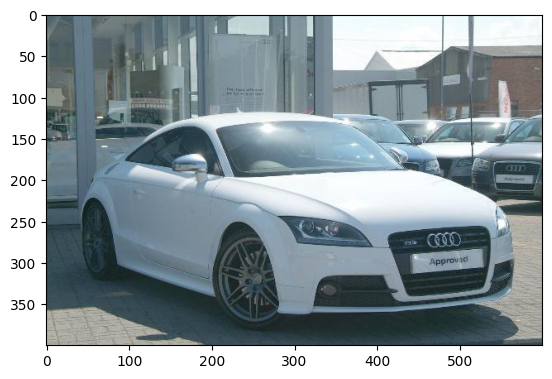

In [74]:
plt.imshow(plt.imread(training_data_dir.joinpath(y_labels['annotations'][0][0][0][0][9:])))
plt.show()

## Class names key

In [44]:
y_labels['class_names']

array([[array(['AM General Hummer SUV 2000'], dtype='<U26'),
        array(['Acura RL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Type-S 2008'], dtype='<U20'),
        array(['Acura TSX Sedan 2012'], dtype='<U20'),
        array(['Acura Integra Type R 2001'], dtype='<U25'),
        array(['Acura ZDX Hatchback 2012'], dtype='<U24'),
        array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40'),
        array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34'),
        array(['Aston Martin Virage Convertible 2012'], dtype='<U36'),
        array(['Aston Martin Virage Coupe 2012'], dtype='<U30'),
        array(['Audi RS 4 Convertible 2008'], dtype='<U26'),
        array(['Audi A5 Coupe 2012'], dtype='<U18'),
        array(['Audi TTS Coupe 2012'], dtype='<U19'),
        array(['Audi R8 Coupe 2012'], dtype='<U18'),
        array(['Audi V8 Sedan 1994'], dtype='<U18'),
        array(['Audi 100 Sedan 1994'], dtype='<U

In [45]:
y_labels['class_names'].size

196